In [1]:
!dir


 Volume in drive D is data and work
 Volume Serial Number is CCE1-6DD7

 Directory of D:\PREWORK_HM\project 1\Project_1\Geographically

04/01/2022  02:25 PM    <DIR>          .
04/01/2022  02:25 PM    <DIR>          ..
21/12/2021  08:58 PM    <DIR>          .ipynb_checkpoints
04/01/2022  02:20 PM           460,330 area_corr.ipynb
27/12/2021  07:11 PM               145 config.py
31/12/2021  03:37 PM            58,893 pyplot-table-original.png
30/12/2021  08:05 PM    <DIR>          Resources
27/12/2021  07:11 PM    <DIR>          __pycache__
               3 File(s)        519,368 bytes
               5 Dir(s)  153,286,529,024 bytes free


In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

full_state_name=pd.DataFrame({'State':{0:'ACT',1:'NSW',2:'NT',3:'Qld',4:'SA',5:'Tas',6:'Vic',7:'WA'},
                'State_full' :{0:'New South Wales',1:'Australian Capital Territory',2:'Northern Territory',\
                            3:'Queensland',4:'South Australia',5:'Tasmania',6:'Victoria',7:'Western Australia'},\
                    'S_color':{0:'#055785',1:'#5B96B5',2:'#3F3F3F',3:'#A7CCDF',4:'#76A9C4',5:'#90BCD2',6:'#3C7FA3',7:'#226C95'},\
                    'ZIP'    :{0:'2600',1:'2000',2:'0800',3:'4000',4:'5000',5:'7000',6:'3000',7:'6000'},\
                   'Capital' :{0:'Canberra',1:'Sydney',2:'Darwin',3:'Brisbane',4:'Adelaide',5:'Hobart',6:'Melbourne',7:'Perth'},\
                 'Line_style':{0:'dashdot',1:'dashed',2:'dotted',3:'solid',4:'dashdot',5:'dotted',6:'dashed',7:'solid'}     })

#file path
file_one="Resources/clean_crash_population.csv"

# read file with Pandas, and store its contents in a new variable
source_pd=pd.read_csv(file_one,low_memory=False)
LGA_name=source_pd["National LGA Name 2017"].unique()

#state_name=source_pd["State"].unique()
#full_state_name['fatality']=
print(full_state_name)
temp=source_pd.groupby('State')['Crash ID'].count().to_frame()
full_state_name=full_state_name.merge(temp,on='State')
#https://www.abs.gov.au/ausstats/abs@.nsf/Lookup/by%20Subject/1270.0.55.003~July%202016~Main%20Features~Local%20Government%20Areas%20(LGA)~7

  State                    State_full  S_color   ZIP    Capital Line_style
0   ACT               New South Wales  #055785  2600   Canberra    dashdot
1   NSW  Australian Capital Territory  #5B96B5  2000     Sydney     dashed
2    NT            Northern Territory  #3F3F3F  0800     Darwin     dotted
3   Qld                    Queensland  #A7CCDF  4000   Brisbane      solid
4    SA               South Australia  #76A9C4  5000   Adelaide    dashdot
5   Tas                      Tasmania  #90BCD2  7000     Hobart     dotted
6   Vic                      Victoria  #3C7FA3  3000  Melbourne     dashed
7    WA             Western Australia  #226C95  6000      Perth      solid


In [3]:
import gmaps
import requests
import gmaps.datasets
from config import weather_api,gkey
# Google developer API key
 
#from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&"
raw_data=[]


# Build query URL

for city in full_state_name['Capital']:
    query_url = url +  "q=" + city+ ",au"+"&appid=" + weather_api 
    weather_response = requests.get(query_url)
    raw_data.append(weather_response.json())

coordinates_data_df=pd.DataFrame(columns=['Capital','country','lon','lat'])
for i in range(len(raw_data)):
    coordinates_data_df=coordinates_data_df.append({'lon'     :raw_data[i]['coord']['lon'],
                                                    'lat'     :raw_data[i]['coord']['lat'],
                                                    'country' :raw_data[i]['sys']['country'],
                                                    'Capital'    :raw_data[i]['name']
                           }, ignore_index=True)
print(coordinates_data_df)
full_state_name=full_state_name.merge(coordinates_data_df,on='Capital')
full_state_name

     Capital country       lon      lat
0   Canberra      AU  149.1281 -35.2835
1     Sydney      AU  151.2073 -33.8679
2     Darwin      AU  130.8418 -12.4611
3   Brisbane      AU  153.0281 -27.4679
4   Adelaide      AU  138.6000 -34.9333
5     Hobart      AU  147.3294 -42.8794
6  Melbourne      AU  144.9633 -37.8140
7      Perth      AU  115.8333 -31.9333


,State,State_full,S_color,ZIP,Capital,Line_style,Crash ID,country,lon,lat
0,ACT,New South Wales,#055785,2600,Canberra,dashdot,475,AU,149.1281,-35.2835
1,NSW,Australian Capital Territory,#5B96B5,2000,Sydney,dashed,16238,AU,151.2073,-33.8679
2,NT,Northern Territory,#3F3F3F,0800,Darwin,dotted,1633,AU,130.8418,-12.4611
3,Qld,Queensland,#A7CCDF,4000,Brisbane,solid,10423,AU,153.0281,-27.4679
4,SA,South Australia,#76A9C4,5000,Adelaide,dashdot,4527,AU,138.6000,-34.9333
5,Tas,Tasmania,#90BCD2,7000,Hobart,dotted,1535,AU,147.3294,-42.8794
6,Vic,Victoria,#3C7FA3,3000,Melbourne,dashed,11499,AU,144.9633,-37.8140
7,WA,Western Australia,#226C95,6000,Perth,solid,6236,AU,115.8333,-31.9333


In [4]:

crash_to_population              =source_pd.groupby(['State','Year'])['Crash ID'].count().to_frame()
crash_to_population['Population']=source_pd.groupby(['State','Year'])['All'].max()
crash_to_population['Percentage']=crash_to_population['Crash ID']/crash_to_population['Population']
crash_to_population              =crash_to_population.reset_index()
crash_to_population

,State,Year,Crash ID,Population,Percentage
0,ACT,1989,32,279219,0.000115
1,ACT,1990,26,285012,0.000091
2,ACT,1991,17,291523,0.000058
3,ACT,1992,20,296519,0.000067
4,ACT,1993,12,300490,0.000040
...,...,...,...,...,...
259,WA,2017,159,2582563,0.000062
260,WA,2018,158,2606394,0.000061
261,WA,2019,163,2646132,0.000062
262,WA,2020,154,2670646,0.000058


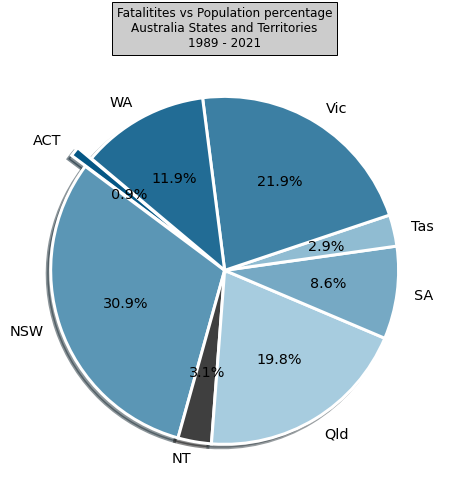

,Crash ID,State
0,475,ACT
1,16238,NSW
2,1633,NT
3,10423,Qld
4,4527,SA
5,1535,Tas
6,11499,Vic
7,6236,WA


In [5]:
explode = (0.1, 0, 0, 0, 0, 0,0,0)  
# Plot
fig=plt.figure(figsize=(10, 8))
plt.pie(full_state_name['Crash ID'], explode=explode, labels=full_state_name['State'], colors=full_state_name['S_color'],
autopct='%1.1f%%', shadow=True, startangle=140,wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},textprops={'size': 'x-large'})
plt.title("Fatalitites vs Population percentage\n" + "Australia States and Territories\n"+"1989 - 2021", bbox={'facecolor':'0.8', 'pad':5})
plt.show()
full_state_name[['Crash ID','State']]

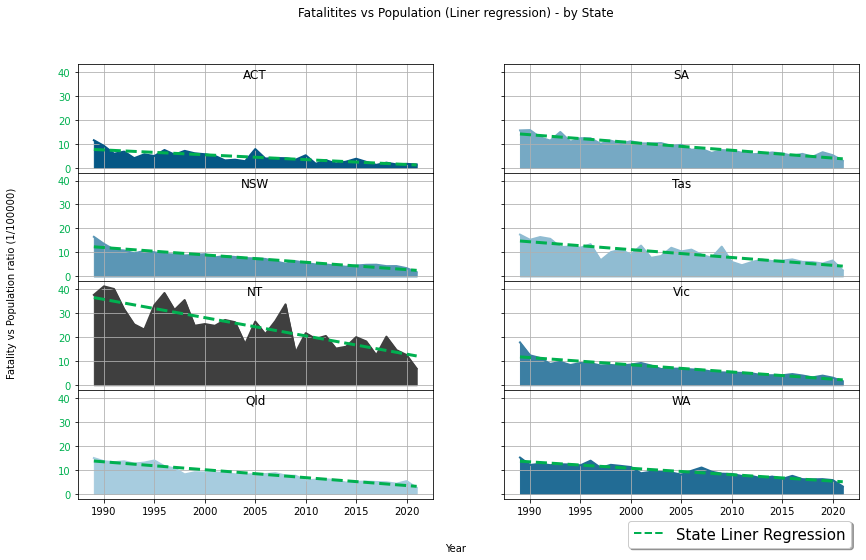

In [6]:
from scipy.stats import linregress
from matplotlib.lines import Line2D


legend_elements=[]
total_reg=[]
slops=[]
regression_list=[]
index2=0

fig=plt.figure(figsize=(14, 8))
fig.text(0.5,0.04,'Year',ha='center',va='center')
fig.text(0.06, 0.5, 'Fatality vs Population ratio (1/100000)', ha='center', va='center', rotation='vertical')
#plt.ylabel('Fatality to Population (%)')

gs = fig.add_gridspec(full_state_name['State_full'].count()//2,2, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
for i in range(4):
    plt.sca(axs[i,0])
    plt.yticks([0.0000,0.0001,0.0002,0.0003,0.0004], ['0','10','20','30','40'], color='#00B050')
#plt.yticks(np.arange(0, 40, 10))

fig.suptitle('Fatalitites vs Population (Liner regression) - by State')
legend_elements.append(Line2D([0], [0], color='#00B050', linestyle='dashed',lw=2, label="State Liner Regression"))
for index,state in full_state_name.iterrows():
    
    if index>=4 :
        index2=1
    sub_set=crash_to_population[crash_to_population['State']==state['State']][['Year','Percentage']]
    
    x_axis= sub_set['Year']
    
    axs[index-(4*index2),index2].plot(x_axis, sub_set['Percentage'], linewidth=2,  color=state['S_color'])
    axs[index-(4*index2),index2].fill_between(x_axis, sub_set['Percentage'], color=state['S_color'])
    axs[index-(4*index2),index2].grid()
    axs[index-(4*index2),index2].set_title(state['State'],y=1.0,pad=-14)
    
    #x_values = weight
    #y_values = volume
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, sub_set['Percentage'])
    slops.append(slope)
   
    regress_values = x_axis * slope + intercept
    regression_list.append(regress_values)
    total_reg.append({'State':state['State'],'Slope':slope})
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    axs[index-(4*index2),index2].plot(x_axis,regress_values,'#00B050',linewidth=3,linestyle='dashed')

sorted_regression = sorted(total_reg, key=lambda k: k['Slope'], reverse=False)
fig.legend(handles=legend_elements,bbox_to_anchor=(0.9, 0.1),fancybox=True, shadow=True,prop={'size': 15})


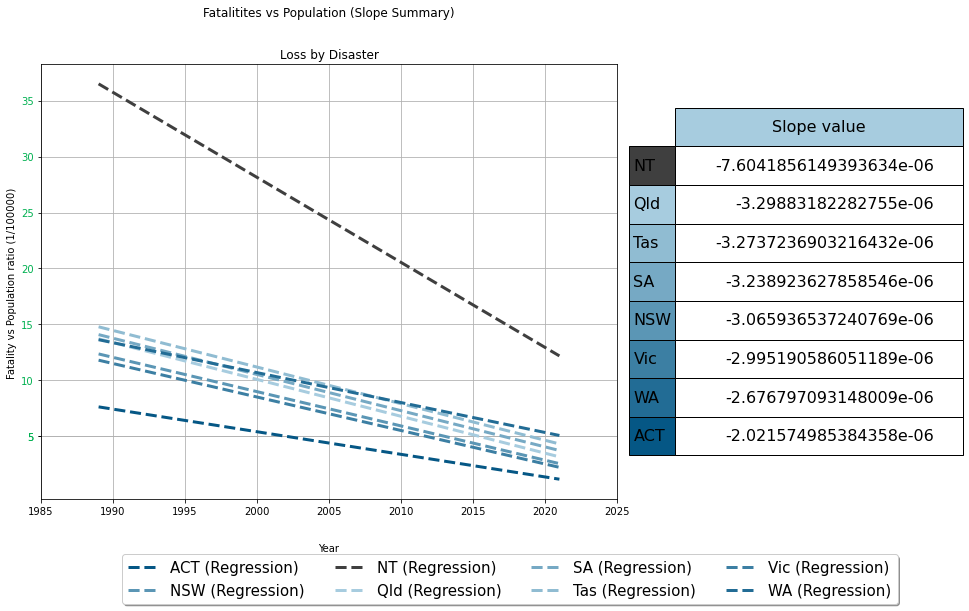

In [7]:
# 

table_data=[]
states=[]
colors=[]
for index in range(len(sorted_regression)):
    states.append(sorted_regression[index]['State'])
    table_data.append([sorted_regression[index]['Slope']])
    colors.append(full_state_name.loc[full_state_name['State']==sorted_regression[index]['State']]['S_color'].values[0])
   


columns = ['Slope value']


index_list=[]
fig=plt.figure(figsize=(10,8))
fig.suptitle('Fatalitites vs Population (Slope Summary)' )
plt.grid()
fig.text(0.5,0.04,'Year',ha='center',va='center')
fig.text(0.06, 0.5, 'Fatality vs Population ratio (1/100000)', ha='center', va='center', rotation='vertical')
plt.yticks([0.00005,0.00005,0.0001,0.00015,0.0002,0.00025,0.0003,0.00035], ['0','5','10','15','20','25','30','35'], color='#00B050')
for index,state in full_state_name.iterrows():
    plt.plot(x_axis,regression_list[index],state['S_color'],linestyle='dashed',label=f"{state['State']} (Regression)",linewidth=3)
    
    index_list.append(index+1)
    #table_data.append(total_reg[index].tolist())


a = np.array(table_data)




the_table = plt.table(cellText=table_data,
                      rowLabels=states,
                      rowColours=colors,
                      colLabels=['Slope value'],
                      colColours=['#A7CCDF'],
                      loc='right',
                      bbox=[1.1,0.1,0.5,0.8])
the_table.auto_set_font_size(False)
the_table.set_fontsize(16)
#the_table.auto_set_column_width((1, 1))
the_table.scale(1,3)
# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.1, wspace=0.8)

plt.xlim(1985,2025)
plt.title('Loss by Disaster')

plt.legend(bbox_to_anchor=(1.5, -0.11),ncol=4,fancybox=True, shadow=True,prop={'size': 15})
plt.show()


In [8]:

source_pd.groupby('Speed Limit')['Crash ID'].count().to_frame()



,Crash ID
Speed Limit,
-9,684
10,18
100,18170
110,5997
130,115
15,1
20,27
25,2
30,14


In [9]:
#drop not numeric data
speed_clean_data=source_pd[pd.to_numeric(source_pd['Speed Limit'], errors='coerce').notnull()]

#convert 'Speed Limit' column type from text to float
speed_clean_data['Speed Limit']=pd.to_numeric(speed_clean_data['Speed Limit'], downcast="float")

#drop speed that less than Zero
speed_clean_data=speed_clean_data.loc[speed_clean_data['Speed Limit']>0]

#calculate the cleaned data set 
speed_clean_data.groupby('Speed Limit')['Crash ID'].count().to_frame()



<ipython-input-9-49449121fe95>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speed_clean_data['Speed Limit']=pd.to_numeric(speed_clean_data['Speed Limit'], downcast="float")


,Crash ID
Speed Limit,
5.0,3
10.0,18
15.0,1
20.0,27
25.0,2
30.0,14
40.0,343
50.0,2874
60.0,13640


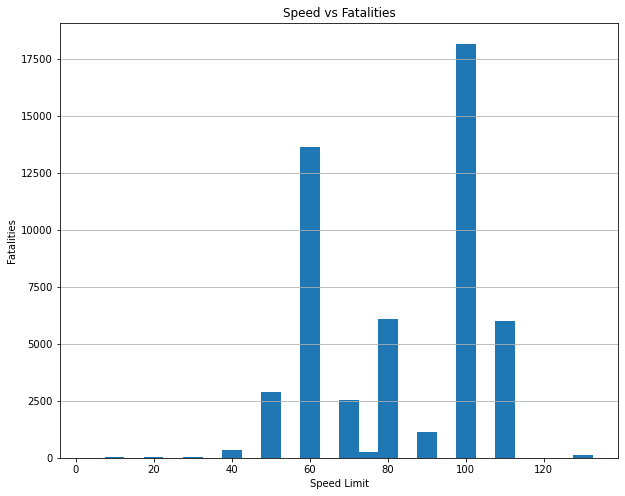

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

dp=speed_clean_data.groupby('Speed Limit')['Crash ID'].count().to_frame().reset_index()
fig=plt.figure(figsize=(10,8))
plt.bar(dp['Speed Limit'],dp['Crash ID'],width = 5)

plt.grid(axis='y')
#ax.grid(which='major', axis='y', linestyle='--')
plt.title('Speed vs Fatalities')
plt.xlabel('Speed Limit')
plt.ylabel('Fatalities')
plt.show()

In [11]:

df=speed_clean_data.groupby(['State','Speed Limit'])['Crash ID'].count().to_frame().reset_index()
print(df)

   State  Speed Limit  Crash ID
0    ACT         10.0         1
1    ACT         40.0         4
2    ACT         50.0        19
3    ACT         60.0        39
4    ACT         70.0         5
..   ...          ...       ...
78    WA         70.0       510
79    WA         80.0       570
80    WA         90.0       376
81    WA        100.0       281
82    WA        110.0      2625

[83 rows x 3 columns]


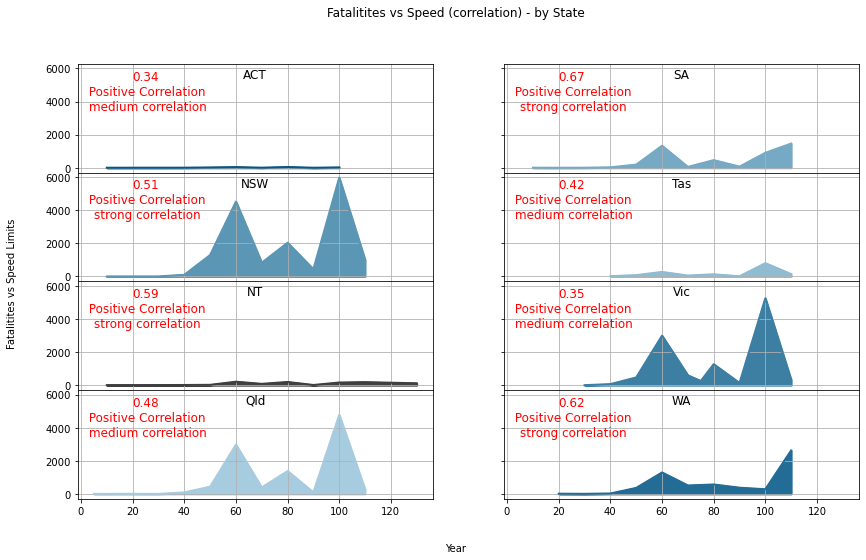

In [12]:
import scipy.stats as st
from matplotlib.lines import Line2D


legend_elements=[]
total_reg=[]
slops=[]
regression_list=[]
index2=0

fig=plt.figure(figsize=(14, 8))

fig.text(0.5,0.04,'Year',ha='center',va='center')
fig.text(0.06, 0.5, 'Fatalitites vs Speed Limits', ha='center', va='center', rotation='vertical')
#plt.ylabel('Fatality to Population (%)')

gs = fig.add_gridspec(full_state_name['State_full'].count()//2,2, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
for i in range(4):
    plt.sca(axs[i,0])
  #  plt.yticks([0.0000,0.0001,0.0002,0.0003,0.0004], ['0','10','20','30','40'], color='#00B050')
#plt.yticks(np.arange(0, 40, 10))

fig.suptitle('Fatalitites vs Speed (correlation) - by State')

for index,state in full_state_name.iterrows():
    
    if index>=4 :
        index2=1
    sub_set=crash_to_population[crash_to_population['State']==state['State']][['Year','Percentage']]
    
    x_axis= df[df['State']==state['State']]['Speed Limit']
    y_axis= df[df['State']==state['State']]['Crash ID']
    axs[index-(4*index2),index2].plot(x_axis, y_axis, linewidth=2,  color=state['S_color'])
    axs[index-(4*index2),index2].fill_between(x_axis, y_axis, linewidth=2,  color=state['S_color'])
    
    axs[index-(4*index2),index2].grid()
    correlation = st.pearsonr(x_axis,y_axis)
    axs[index-(4*index2),index2].set_title(state['State'],y=1.0,pad=-14)
    if round(correlation[0],2)>  0.5 :
        temp=f"{round(correlation[0],2)}\n Positive Correlation\n strong correlation"
    elif round(correlation[0],2)>0.30 :
        temp=f"{round(correlation[0],2)}\n Positive Correlation\n medium correlation"
    else:
        temp=f"{round(correlation[0],2)}\n Positive Correlation\n small correlation"
        
    axs[index-(4*index2),index2].text(25,3500,temp,fontsize=12,ha='center',color='red')
    
    
   


In [83]:
#drop not numeric data
Zip_clean_data=source_pd.dropna(subset=['National LGA Name 2017'])

#convert 'Speed Limit' column type from text to float
speed_clean_data['Speed Limit']=pd.to_numeric(speed_clean_data['Speed Limit'], downcast="float")

#drop speed that less than Zero
speed_clean_data=speed_clean_data.loc[speed_clean_data['Speed Limit']>0]

#calculate the cleaned data set 
subset=Zip_clean_data.groupby(['State','National LGA Name 2017'])['Crash ID'].count().to_frame().reset_index()
subset

,State,National LGA Name 2017,Crash ID
0,ACT,Unincorporated ACT,51
1,NSW,Albury,5
2,NSW,Armidale Regional,12
3,NSW,Ballina,12
4,NSW,Balranald,5
...,...,...,...
494,WA,Williams (S),4
495,WA,Wongan-Ballidu (S),2
496,WA,Wyndham-East Kimberley (S),12
497,WA,Yilgarn (S),4


In [84]:
# Dependencies
import requests
import json
from pprint import pprint

# Google developer API key
from config import gkey

In [85]:
subset = subset.reindex(columns = subset.columns.tolist() + ['lat','lng'])



# Build the endpoint URL
for index,road in subset.iterrows():
    target_city = f"{road['National LGA Name 2017']}, {road['State']}, Australia"
    target_url = f"https://maps.googleapis.com/maps/api/geocode/json?address={target_city}&key={gkey}&result_type=intersection|street_address|route"
    # Run a request to endpoint and convert result to json
    geo_data = requests.get(target_url).json()
    subset.iloc[index,3]=geo_data['results'][0]['geometry']['location']['lat']
    subset.iloc[index,4]=geo_data['results'][0]['geometry']['location']['lng']

# Print the json
pprint(geo_data['results'][0]['geometry']['location'])


{'lat': -31.8748896, 'lng': 116.7692532}


In [88]:
subset.to_csv('Road_coords.csv')
subset


,State,National LGA Name 2017,Crash ID,lat,lng
0,ACT,Unincorporated ACT,51,-34.921906,138.596188
1,NSW,Albury,5,-36.075119,146.909485
2,NSW,Armidale Regional,12,-30.503571,151.652337
3,NSW,Ballina,12,-28.862799,153.565816
4,NSW,Balranald,5,-34.639438,143.562914
...,...,...,...,...,...
494,WA,Williams (S),4,-33.027756,116.879161
495,WA,Wongan-Ballidu (S),2,-30.750998,116.891034
496,WA,Wyndham-East Kimberley (S),12,-15.540957,126.954107
497,WA,Yilgarn (S),4,-30.793825,119.232078


In [89]:
import numpy as np

km_lat=0.009043717
km_lng=0.008983112
def draw_circle(x,y,size):
    circle_poly=[]
    
    for i in range(0,360,10):
        x1=x+np.sin(np.radians(i))*km_lat*size
        y1=y+np.cos(np.radians(i))*km_lat*size
        circle_poly.append((x1,y1))


    return circle_poly
#

def bar_draw(x,y,hight):
    return ([(x,y),(x+hight,y),(x+hight,y+0.5),(x,y+0.5)])
#Latitude: 1 deg = 110.574 km. Longitude: 1 deg = 111.320*cos(latitude) km

In [148]:

# Access maps with unique API key
gmaps.configure(api_key=gkey)
# Create a list containing coordinates

# Customize the size of the figure
figure_layout = {
    'width': '800px',
    'height': '800px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig=[]
state_polygon=[]
total=full_state_name['Crash ID'].sum()

for index1,state1 in full_state_name.iterrows():
    
    
    url = "https://nominatim.openstreetmap.org/search.php?"
    geo_data=[]


    # Build query URL
    query_url = url +  "q=" + state1['State_full']+ "+Australia&polygon_geojson=1&format=json"
    weather_response = requests.get(query_url)
    temp=(weather_response.json())
    dd={'features': [{'geometry': temp[0]['geojson'],'type': 'Feature'}],'type': 'FeatureCollection'}
   
    
   
    fig.append(gmaps.figure())
    fig[index1]=gmaps.figure(center=(state1['lat'],state1['lon'] ), zoom_level=6,layout=figure_layout)
 
    geojson_layer = gmaps.geojson_layer(dd)
    state_polygon.append(geojson_layer)
    fig[index1].add_layer(geojson_layer)
 



In [149]:
full_state_name.iloc[:1]

,State,State_full,S_color,ZIP,Capital,Line_style,Crash ID,country,lon,lat
0,ACT,New South Wales,#055785,2600,Canberra,dashdot,475,AU,149.1281,-35.2835


In [150]:
def draw_state(index):
   
    state=full_state_name.iloc[index,:]
    road_data=subset.loc[subset['State']==state['State']]
    max_color=0.99/road_data['Crash ID'].max()

    temp=fig[index]

    for index1,road in road_data.iterrows():

        bar_path=draw_circle(road['lat'],road['lng'],road['Crash ID'])
        bar_polygon = gmaps.Polygon(
        bar_path,
        stroke_color='red',
        fill_color='red',

        fill_opacity=road['Crash ID']*max_color)
        drawing = gmaps.drawing_layer(
        features=[bar_polygon],
        show_controls=False)
        temp.add_layer(drawing)
    for i in range(30,500,50):
        bar_path=draw_circle(state['lat'],state['lon'],i)
        bar_polygon = gmaps.Polygon(
        bar_path,
        stroke_color=state['S_color'],
        fill_color=state['S_color'],

        fill_opacity=0.001)
        drawing = gmaps.drawing_layer(
        features=[bar_polygon],
        show_controls=False)
        temp.add_layer(drawing)    

        


In [151]:
draw_state(0)
fig[0]

Figure(layout=FigureLayout(border='1px solid black', height='800px', margin='0 auto 0 auto', padding='1px', wi…

In [152]:
draw_state(1)
fig[1]

Figure(layout=FigureLayout(border='1px solid black', height='800px', margin='0 auto 0 auto', padding='1px', wi…

In [153]:
draw_state(2)
fig[2]

Figure(layout=FigureLayout(border='1px solid black', height='800px', margin='0 auto 0 auto', padding='1px', wi…

In [154]:
draw_state(3)
fig[3]

Figure(layout=FigureLayout(border='1px solid black', height='800px', margin='0 auto 0 auto', padding='1px', wi…

In [155]:

draw_state(4)
fig[4]

Figure(layout=FigureLayout(border='1px solid black', height='800px', margin='0 auto 0 auto', padding='1px', wi…

In [156]:
draw_state(5)
fig[5]

Figure(layout=FigureLayout(border='1px solid black', height='800px', margin='0 auto 0 auto', padding='1px', wi…

In [157]:
draw_state(6)
fig[6]

Figure(layout=FigureLayout(border='1px solid black', height='800px', margin='0 auto 0 auto', padding='1px', wi…

In [158]:
draw_state(7)
fig[7]

Figure(layout=FigureLayout(border='1px solid black', height='800px', margin='0 auto 0 auto', padding='1px', wi…